
--- Métricas do Texto 1 ---
Grau: {'bolsa brasileira': 2, 'União Europeia': 2, 'Banco Central Europeu': 2}
Centralidade de Grau: {'bolsa brasileira': 1.0, 'União Europeia': 1.0, 'Banco Central Europeu': 1.0}
Centralidade de Intermediação: {'bolsa brasileira': 0.0, 'União Europeia': 0.0, 'Banco Central Europeu': 0.0}
Centralidade de Proximidade: {'bolsa brasileira': 1.0, 'União Europeia': 1.0, 'Banco Central Europeu': 1.0}
Densidade: 1.0

--- Métricas do Texto 2 ---
Grau: {}
Centralidade de Grau: {}
Centralidade de Intermediação: {}
Centralidade de Proximidade: {}
Densidade: 0

--- Métricas do Texto 3 ---
Grau: {'União Europeia': 1, 'Fórum Econômico Mundial': 1}
Centralidade de Grau: {'União Europeia': 1.0, 'Fórum Econômico Mundial': 1.0}
Centralidade de Intermediação: {'União Europeia': 0.0, 'Fórum Econômico Mundial': 0.0}
Centralidade de Proximidade: {'União Europeia': 1.0, 'Fórum Econômico Mundial': 1.0}
Densidade: 1.0


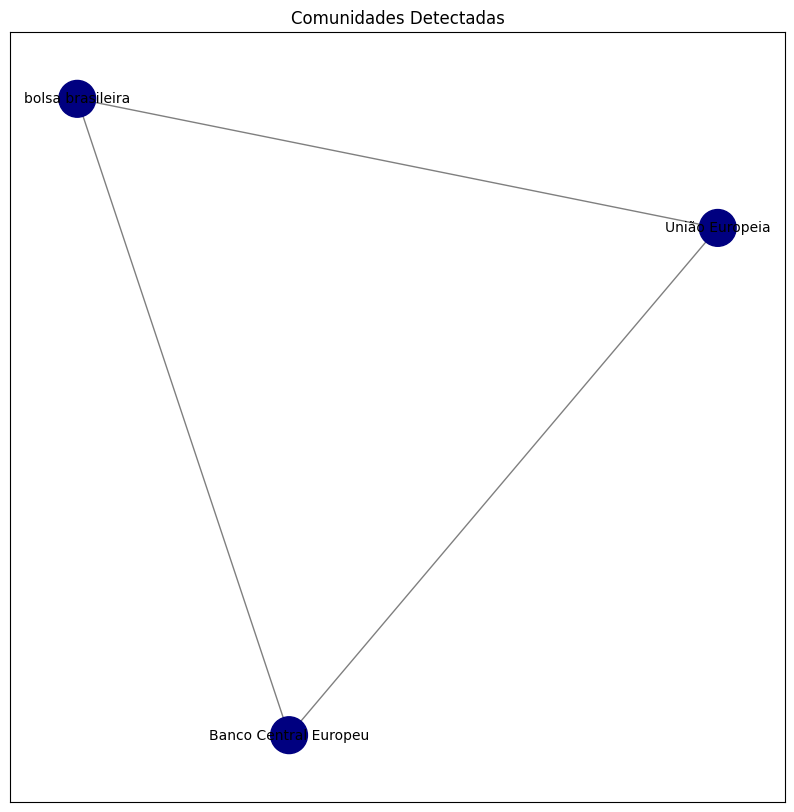

Nenhum hub encontrado no grafo do Texto 1.


In [3]:
# Instalação das bibliotecas necessárias
!pip install spacy networkx matplotlib python-louvain

# Importar bibliotecas
import spacy
import networkx as nx
import matplotlib.pyplot as plt
import community.community_louvain as community_louvain

# Carregar o modelo do spaCy para o português
try:
    nlp = spacy.load("pt_core_news_sm")
except OSError:
    # Baixar o modelo se não estiver disponível
    !python -m spacy download pt_core_news_sm
    nlp = spacy.load("pt_core_news_sm")

# Textos fornecidos
text1 = """
Dólar cai abaixo de R$ 6 com expectativas por tarifas de Trump; bolsa sobe O dólar opera em forte queda nesta quarta-feira (22) e se afasta do patamar de R$ 6 com mercados em todo o mundo acompanhando as medidas tarifárias apresentadas pelo presidente dos Estados Unidos, Donald Trump.
Por volta das 12h30, a divisa norte-americana operava com recuo de 1,35%, na faixa de R$ 5,94, em linha com perdas no mercado global. Na mínima, a divisa bateu R$ 5,92.O desempenho acompanha o movimento global, com dólar atingindo a mínima de duas semanas ante as principais moedas do mundo.
Na mesma hora, o Ibovespa, principal índice da bolsa brasileira, subia erca de 0,2%, a 123,5 mil pontos. Na terça-feira (21), o dólar à vista fechou em leve queda de 0,18%, a R$ 6,031.O dólar se mantém majoritariamente acima de R$ 6 desde o fim de novembro do ano passado, com o recrudescimento do temor do mercado com as contas públicas do governo federal.A última vez que a divisa encerrou abaixo da marca de R$ 6 foi em 11 de dezembro, a R$ 5,959.Trump e tarifasMercados em todo o mundo acompanham os primeiros passos de Trump de volta à Casa Branca.
Na véspera, o republicano afirmou que seu governo está discutindo a imposição, a partir de fevereiro, de uma tarifa de 10% sobre os produtos importados da China.Além disso, ele citou barreiras para produtos da União Europeia, Canadá e México.Mais cedo, a presidente do Banco Central Europeu, Christine Lagarde, afirmou que o objetivo de Trump de fomentar a manufatura no país por meio do aumento de barreiras comerciais é uma abordagem questionável, uma vez que a economia já está funcionando perto de sua capacidade.Apesar de renovar suas ameaças tarifárias nos primeiros dias do cargo, Trump apenas orientou até agora as agências federais a investigarem os déficits comerciais dos EUA e as práticas comerciais injustas de parceiros.
Essa abordagem do governo Trump, de primeiro ameaçar para depois estudar se realmente vai ser implantada alguma tarifa sobre as outras economias, tem levado a um movimento de enfraquecimento global do dólar", disse Leonel Mattos, analista de Inteligência de Mercado da StoneX.
"Visto o que se antecipava, o receio era de que ele teria uma postura agressiva já no seu primeiro dia de mandato", completou.
"""

text2 = """
Dólar opera com baixa frente ao real e investidores seguem atentos a Trump e medidas fiscais no BrasilO dólar operava com baixa frente ao real nas primeiras negociações desta quarta-feira (22), em linha com as perdas nos mercados globais e abaixo dos R$ 6, à medida que investidores continuam de olho nas medidas apresentadas pelo presidente dos Estados Unidos, Donald Trump, e ponderavam sobre a possibilidade de anúncio de novas medidas fiscais no Brasil.Cotação em tempo realÀs 14h27, o dólar à vista caía 1,73%, a R$ 5,925 na compra e R$ 5,926 navenda. Na B3, o contrato de dólar futuro de primeiro vencimento DOLc1 tinha baixa de 0,4%, a R$ 6,012.Na terça-feira, o dólar à vista fechou em leve queda de 0,18%, a R$ 6,0313.O Banco Central fará nesta sessão um leilão de até 15.000 contratos de swap cambial tradicional para fins de rolagem do vencimento de 5 de março de 2025.Dólar comercial.Compra: R$ 5,925.Venda: R$ 5,926.Dólar turismo.Compra: R$ 6,06.Venda: R$ 6,24
O que aconteceu com o dólar?Os investidores continuam concentrados em notícias vindas da maior economia do mundo, onde Trump inicia seu novo governo com a assinatura de uma série de decretos e o anúncio de planos para as próximas semanas.Os mercados têm voltado suas atenções para qualquer indício sobre como será a abordagem do governo Trump para a política comercial do país, uma vez que a promessa de imposição de tarifas de importação esteve no centro da campanha presidencial do republicano.
Apesar de renovar suas ameaças tarifárias nos primeiros dias do cargo, Trump apenas orientou até agora as agências federais a investigarem os déficits comerciais dos EUA e as práticas comerciais injustas de parceiros.
O analista da Nova Futura Investimentos Alan Martins atribui a extensão da queda do dólar ante o real, pelo terceiro dia seguido, à abordagem mais lenta e moderada do presidente dos Estados Unidos, Donald Trump, adotando medidas isoladas e gradativas, reduzido o impacto temido pelo mercado."Trump está seguindo padrões de seu primeiro mandato. Isso favorece investidores institucionais e estrangeiros, que aumentam suas posições vendidas em dólar", observa Martins.O analista prevê que o dólar pode chegar a R$ 5,960 até 31 de janeiro. Caso os dados de arrecadação do governo venham acima das previsões, como sinalizou o ministro da Fazenda, Fernando Haddad, a queda da divisa pode acelerar, beneficiando o real, avalia Martins.Até o momento, não há previsão da data da divulgação oficial dos dados da arrecadação de dezembro.
"""

text3 = """
Dólar opera em queda e vai a R$ 5,91, com política tarifária de Trump no radar; Ibovespa oscilaNa véspera, a moeda norte-americana recuou 0,18%, cotada a R$ 6,0302. Já o principal índice da bolsa de valores avançou 0,39%, aos 123.338 pontos.O dólar opera em queda nesta quarta-feira (22) e ficou abaixo de R$ 6 já nos primeiros minutos de pregão. O Ibovespa, principal índice da bolsa de valores brasileira, oscila entre altas e baixas.Os investidores continuam a precificar os possíveis rumos da política tarifária dos Estados Unidos com a chegada de Donald Trump à presidência.Na véspera, Trump reforçou a promessa de impor tarifas de 10% à China e à União Europeia, além de considerar alíquotas de até 25% contra México e Canadá. A falta de medidas concretas sobre o tema tembeneficiado outras moedas ao redor do mundo.Além disso, o mercado acompanha o Fórum Econômico Mundial em Davos, na Suíça, e está atento aos desdobramentos das contas públicas brasileiras.Na agenda, balanços corporativos e dados econômicos locais e internacionais estão em destaque.Resumo dos mercadosDólarÀs 13h55, o dólar operava em queda de 1,85%, cotado a R$ 5,9184. Na mínima do dia, foi a R$ 5,9154.
Na véspera, a moeda norte-americana recuou 0,18%, cotada a R$ 6,0302. Com o resultado, acumulou:Queda de 0,58% na semana;recuo de 2,42% no mês e no ano.IbovespaNo mesmo horário, o Ibovespa tinha queda de 0,07%, aos 123.248 pontos.Na véspera, o índice avançou 0,39%, aos 123.338 pontos. Com o resultado, acumulou:Alta de 0,81% na semana;Ganho de 2,54% no mês e no ano.Fatores que influenciam o mercadoOs efeitos da posse de Donald Trump como presidente dos Estados Unidos continuam a influenciar os mercados. Além das ordens executivas assinadas no primeiro dia de mandato, novas declarações de Trump sobre um possível "tarifaço" a outros países geraram incertezas sobre os impactos no comércio global.Na terça-feira, durante um evento na Casa Branca, Trump prometeu impor tarifas à União Europeia e afirmou que seu governo já está discutindo uma alíquota de 10% sobre produtos importados da China a partir de 1º de fevereiro.O republicano também ameaçou impor tarifas para o México e para o Canadá, afirmando que há preocupação com o fluxo de drogas provenientes desses dois países.
"""
# Função para extrair entidades nomeadas
def extract_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents if ent.label_ in ["PERSON", "ORG", "GPE"]]
    return entities

# Função para gerar o grafo
def generate_graph(entities):
    G = nx.Graph()
    if not entities:
        print("Aviso: Nenhuma entidade extraída.")
        return G
    for entity1, label1 in entities:
        for entity2, label2 in entities:
            if entity1 != entity2:
                G.add_edge(entity1, entity2)
    return G

# Função para calcular métricas do grafo
def calculate_metrics(G):
    if len(G) == 0:
        return {}, {}, {}, {}, 0
    degree = dict(G.degree())
    degree_centrality = nx.degree_centrality(G)
    betweenness_centrality = nx.betweenness_centrality(G)
    closeness_centrality = nx.closeness_centrality(G)
    density = nx.density(G)
    return degree, degree_centrality, betweenness_centrality, closeness_centrality, density

# Função para detectar comunidades
def detect_communities(G):
    return community_louvain.best_partition(G)

# Função para visualizar o grafo com comunidades
def plot_community_graph(G, partition):
    pos = nx.spring_layout(G)
    plt.figure(figsize=(10, 10))
    nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=700, node_color=list(partition.values()), cmap=plt.cm.jet)
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    nx.draw_networkx_labels(G, pos, font_size=10)
    plt.title("Comunidades Detectadas")
    plt.show()

# Função para visualizar ego network
def plot_ego_network(G, node):
    if node not in G:
        print(f"Nó {node} não encontrado no grafo.")
        return
    ego_nodes = list(nx.ego_graph(G, node).nodes)
    ego_subgraph = G.subgraph(ego_nodes)
    plt.figure(figsize=(8, 8))
    nx.draw_networkx(ego_subgraph, with_labels=True, node_size=2000, font_size=10, node_color="lightblue", edge_color="gray")
    plt.title(f"Ego Network de {node}")
    plt.show()

# Processar os textos e extrair entidades
entities_text1 = extract_entities(text1)
entities_text2 = extract_entities(text2)
entities_text3 = extract_entities(text3)

# Gerar os grafos
graph1 = generate_graph(entities_text1)
graph2 = generate_graph(entities_text2)
graph3 = generate_graph(entities_text3)

# Calcular métricas e exibir resultados
def print_metrics(graph, text_number):
    degree, degree_centrality, betweenness_centrality, closeness_centrality, density = calculate_metrics(graph)
    print(f"\n--- Métricas do Texto {text_number} ---")
    print(f"Grau: {degree}")
    print(f"Centralidade de Grau: {degree_centrality}")
    print(f"Centralidade de Intermediação: {betweenness_centrality}")
    print(f"Centralidade de Proximidade: {closeness_centrality}")
    print(f"Densidade: {density}")

print_metrics(graph1, 1)
print_metrics(graph2, 2)
print_metrics(graph3, 3)

# Detectar e visualizar comunidades para o texto 1
communities_graph1 = detect_communities(graph1)
plot_community_graph(graph1, communities_graph1)

# Exibir ego network de um hub (se houver) no texto 1
degree_graph1 = calculate_metrics(graph1)[0]
hubs_graph1 = {node: deg for node, deg in degree_graph1.items() if deg >= 5}
if hubs_graph1:
    first_hub = list(hubs_graph1.keys())[0]
    print(f"Visualizando ego network do hub: {first_hub}")
    plot_ego_network(graph1, first_hub)
else:
    print("Nenhum hub encontrado no grafo do Texto 1.")